# Investments Portfolio

In [ ]:
!pip install alpha_vantage
!pip install openpyxl
!pip install python-dotenv

In [77]:
import os
from dotenv import load_dotenv
from alpha_vantage.timeseries import TimeSeries
from datetime import date, timedelta
import pandas as pd

# Load variables from .env file
load_dotenv()

# Get the API key securely
api_key = os.getenv("ALPHAVANTAGE_API_KEY")
ts = TimeSeries(key=api_key, output_format='pandas')

In [ ]:
portfolio = pd.read_excel('portfolio.xlsx')
display(portfolio)

,Ativos,Início
0,ITUB4,10000
1,ABEV3,10000
2,VALE3,10000
3,BBDC3,10000


In [ ]:
# Search for the stock symbol
print('Searching for STOCKS')
print(ts.get_symbol_search('itub'))

# Get daily adjusted data for the stock
data, meta_data = ts.get_daily(symbol='ITUB4.SAO', outputsize='full')
display(data)

In [78]:
stock_data = {}
end = pd.Timestamp(date.today() - timedelta(days=1))
start = pd.Timestamp('2021-01-05')

for stock in portfolio['Ativos']:
    print(f'Fetching data for {stock}')
    data, meta_data = ts.get_daily(symbol=f'{stock}.SAO', outputsize='full')
    stock_data[stock] = data
    
    portfolio.loc[portfolio['Ativos'] == stock, 'Qntd'] = portfolio.loc[portfolio['Ativos'] == stock, 'Início'].values / data.loc[start_date, '4. close']


Fetching data for ITUB4
Fetching data for ABEV3
Fetching data for VALE3
Fetching data for BBDC3


In [79]:
display(portfolio)
display(stock_data['ITUB4'])

,Ativos,Início,Qntd
0,ITUB4,10000,325.732899
1,ABEV3,10000,632.511069
2,VALE3,10000,107.526882
3,BBDC3,10000,426.075841


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-09-29,38.8900,38.8900,38.8900,38.8900,18555600.0
2025-09-26,38.5400,38.8600,38.4900,38.6700,12414500.0
2025-09-25,38.8100,39.0200,38.4700,38.4800,14705600.0
2025-09-24,39.0600,39.1400,38.7100,38.7900,18168400.0
2025-09-23,38.4700,39.2400,38.4700,39.0500,16437000.0
...,...,...,...,...,...
2005-01-07,393.0208,397.9968,391.0083,393.4993,129146796.0
2005-01-06,393.9976,399.0132,391.1010,393.9976,372692145.0
2005-01-05,397.9968,400.9995,395.0008,399.0000,863768854.0


In [80]:
ibov, meta_data = ts.get_daily(symbol='BOVA11.SAO', outputsize='full')
ibov.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-09-29,143.45,143.45,143.45,143.45,4038523.0
2025-09-26,142.60,143.26,142.11,142.44,2944933.0
2025-09-25,143.24,143.49,142.20,142.28,5367085.0
2025-09-24,143.50,143.78,143.05,143.42,2322354.0
2025-09-23,142.36,144.12,142.09,143.33,3067703.0


In [81]:
ibov = ibov.copy()
ibov.index = pd.to_datetime(ibov.index)
ibov = ibov.sort_index()
display(ibov)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2008-12-02,35.11,35.81,34.91,35.39,759942.0
2008-12-03,34.73,35.40,33.90,35.31,330158.0
2008-12-04,35.80,36.00,35.15,35.70,128400.0
2008-12-05,34.51,35.35,34.11,35.35,193700.0
2008-12-08,37.35,38.46,36.95,38.46,103100.0
...,...,...,...,...,...
2025-09-23,142.36,144.12,142.09,143.33,3067703.0
2025-09-24,143.50,143.78,143.05,143.42,2322354.0
2025-09-25,143.24,143.49,142.20,142.28,5367085.0


In [82]:
ibov = ibov.loc[start:end, '4. close']
display(ibov)

date
2021-01-05    114.69
2021-01-06    114.55
2021-01-07    118.37
2021-01-08    120.40
2021-01-11    118.62
               ...  
2025-09-23    143.33
2025-09-24    143.42
2025-09-25    142.28
2025-09-26    142.44
2025-09-29    143.45
Name: 4. close, Length: 1186, dtype: float64

<Axes: title={'center': 'IBOV Closing Prices'}, xlabel='date'>

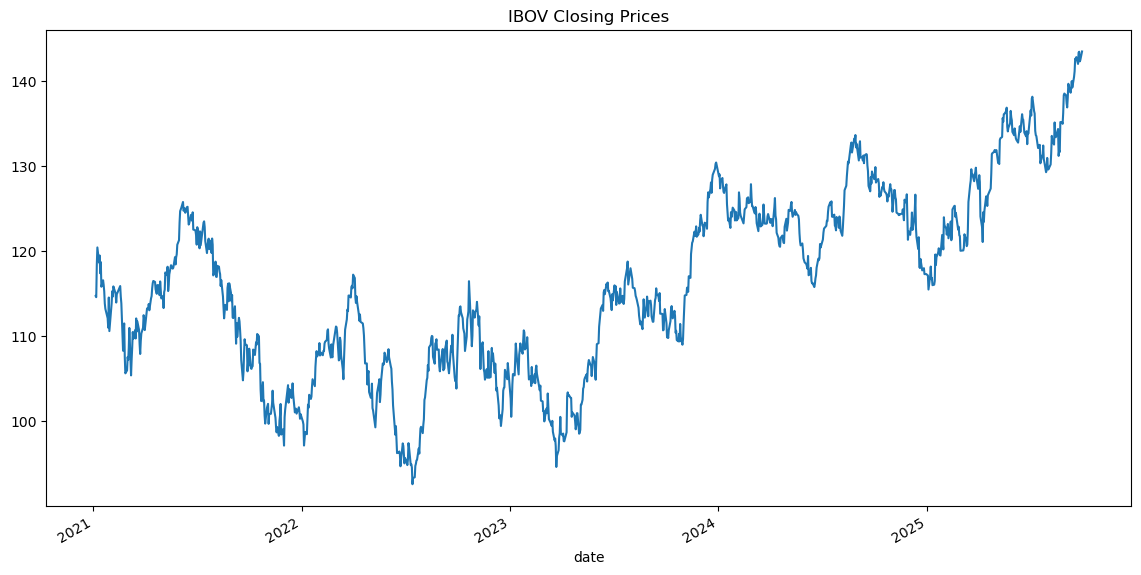

In [83]:
ibov.plot(title='IBOV Closing Prices', figsize=(14, 7))

In [84]:
stock_closed_prices = pd.DataFrame()

for stock in stock_data:
    stock_data[stock].index = pd.to_datetime(stock_data[stock].index)
    stock_data[stock] = stock_data[stock].sort_index()
    stock_closed_prices[stock] = stock_data[stock].loc[start:end, '4. close']
    
stock_closed_prices

,ITUB4,ABEV3,VALE3,BBDC3
date,,,,
2021-01-05,30.7000,15.81,93.00,23.47
2021-01-06,31.6000,16.05,96.05,24.06
2021-01-07,32.8301,16.05,102.32,24.65
2021-01-08,32.8200,16.53,102.00,24.46
2021-01-11,32.0800,16.10,101.98,24.09
...,...,...,...,...
2025-09-23,39.0500,12.46,57.67,15.30
2025-09-24,38.7900,12.38,57.89,15.17
2025-09-25,38.4800,12.46,58.21,15.01


<Axes: title={'center': 'Stock Closing Prices'}, xlabel='date'>

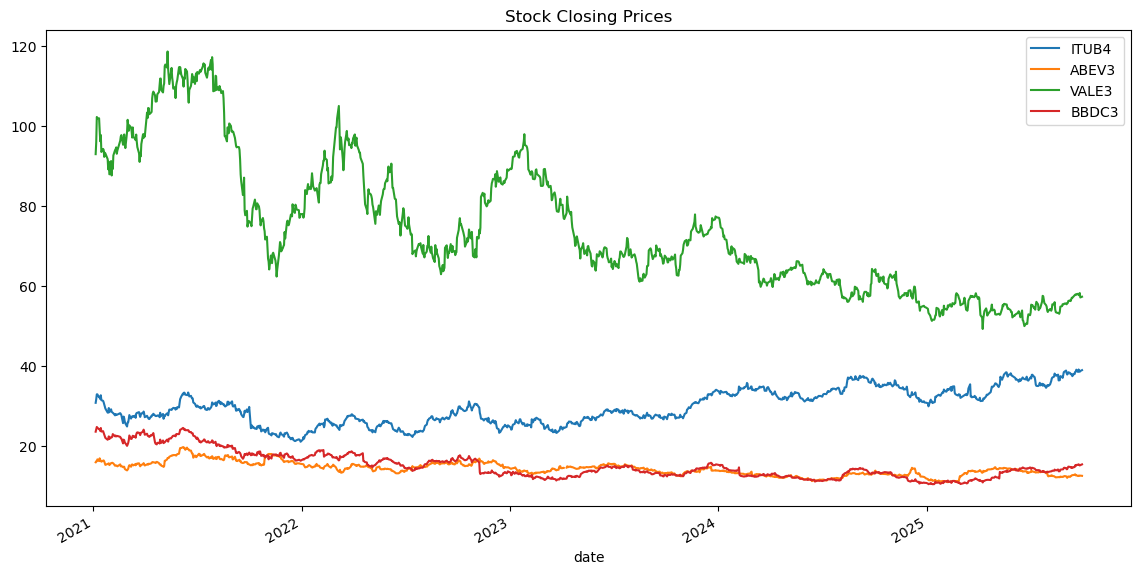

In [85]:
# Plot Stock Prices
stock_closed_prices.plot(title='Stock Closing Prices', figsize=(14, 7))